In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('adult.csv', sep=',\s')
df.head(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [4]:
df.shape

(32560, 15)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
# distinced values in every column
for col in df.columns:
  print(df[col].value_counts())

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: count, Length: 21647, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [7]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [8]:
# replace '?' with nan
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].replace('?', np.nan)

In [9]:
df.isna().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,1843
relationship,0
race,0
sex,0


In [10]:
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(col, df[col].dtype)

workclass object
occupation object
native_country object


In [11]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [13]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [14]:
for col in df.columns:
    if df[col].dtype == 'object':
      print(df[col].value_counts())

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         

In [15]:
data = pd.DataFrame()

for col in df.columns:
    if df[col].dtype == 'object' and col != 'income':
        data = pd.concat([data, pd.get_dummies(df[col], drop_first=True)], axis=1)

data.head()

,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,11th,12th,1st-4th,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [16]:
col = [col for col in df.columns if df[col].dtype == 'O' and col != 'income']

df.drop(col, axis=1, inplace=True)
df = pd.concat([df, data], axis=1)
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,Local-gov,Never-worked,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,50,83311,13,0,0,13,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,215646,9,0,0,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,53,234721,7,0,0,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,28,338409,13,0,0,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,37,284582,14,0,0,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 98 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         32560 non-null  int64 
 1   fnlwgt                      32560 non-null  int64 
 2   education_num               32560 non-null  int64 
 3   capital_gain                32560 non-null  int64 
 4   capital_loss                32560 non-null  int64 
 5   hours_per_week              32560 non-null  int64 
 6   income                      32560 non-null  object
 7   Local-gov                   32560 non-null  bool  
 8   Never-worked                32560 non-null  bool  
 9   Private                     32560 non-null  bool  
 10  Self-emp-inc                32560 non-null  bool  
 11  Self-emp-not-inc            32560 non-null  bool  
 12  State-gov                   32560 non-null  bool  
 13  Without-pay                 32560 non-null  bo

In [18]:
df['income'] = df['income'].apply(lambda x: 0 if x == "<=50K" else 1)
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,Local-gov,Never-worked,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,50,83311,13,0,0,13,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,215646,9,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,53,234721,7,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,28,338409,13,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,37,284582,14,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [19]:
df['income'].value_counts()

,count
income,
0,24719
1,7841


In [20]:
x = df.drop('income', axis=1)
y = df['income']

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [22]:
# make all features in the same range and remove out liars
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

x_train = pd.DataFrame(x_train, columns=x.columns)

In [23]:
# naive base
# my output is non discerete values so i used GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8247850122850123
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      4912
           1       0.62      0.76      0.68      1600

    accuracy                           0.82      6512
   macro avg       0.77      0.80      0.78      6512
weighted avg       0.84      0.82      0.83      6512



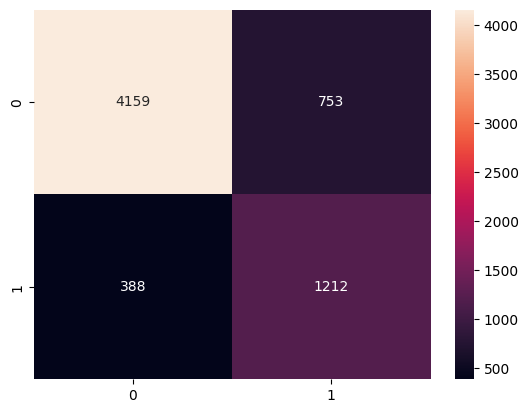

In [24]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

clf = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [26]:
print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_)

{'var_smoothing': 2.310129700083158e-09}
0.8321175331784019
GaussianNB(var_smoothing=2.310129700083158e-09)


In [27]:
model = clf.best_estimator_
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8356879606879607
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4912
           1       0.69      0.60      0.64      1600

    accuracy                           0.84      6512
   macro avg       0.78      0.76      0.77      6512
weighted avg       0.83      0.84      0.83      6512



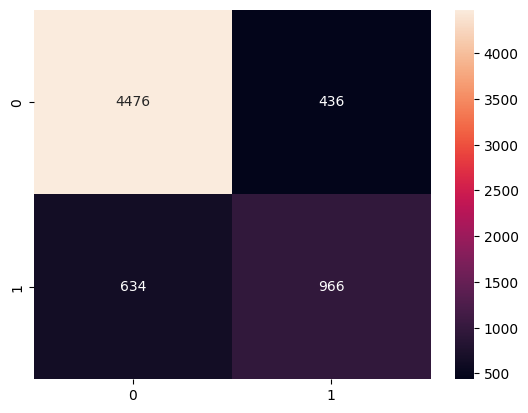

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Handel unbalanced data by SMOTE

In [29]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [30]:
nb = GaussianNB()
nb.fit(x_train_smote, y_train_smote)
y_pred = nb.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8019041769041769
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      4912
           1       0.57      0.82      0.67      1600

    accuracy                           0.80      6512
   macro avg       0.75      0.81      0.76      6512
weighted avg       0.84      0.80      0.81      6512



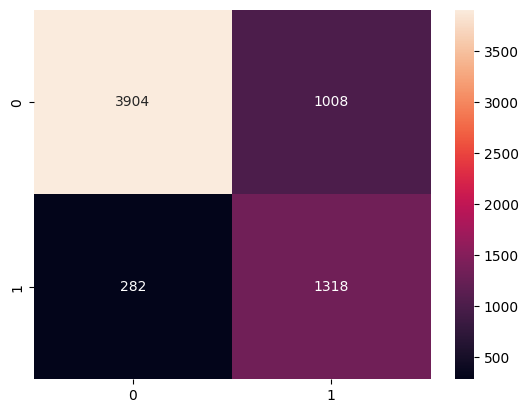

In [31]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()